In [12]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
import shapely.ops as so


In [13]:
VARIANT = 5
ITERATIONS = 5
TEMP_STEP = 3

In [14]:
plt.rcParams['figure.figsize'] = [12, 5] 

In [15]:
temps = []

temps.append(12 + .5 * VARIANT)

def new_t_from_current(currentTemp):
    return round(currentTemp + TEMP_STEP, 1)

for i in range(ITERATIONS):
    temps.append(new_t_from_current(temps[i]))    

In [16]:
V = np.arange(0, 1001, 200)
T = np.arange(0, 61, 10)

In [17]:
lowT = [(0, 1), (10, 1), (20, 0)]
medT = [(10, 0), (20, 1), (30, 0)]
highT = [(20, 0), (30, 1), (40, 1), (50, 1), (60, 1)]

lowV = [(0, 1), (200, 1), (400, 0)]
medV = [(200, 0), (400, 1), (600, 0)]
highV = [(400, 0), (600, 1), (800, 1), (1000, 1)]

In [19]:
def get_y_from_x(ax, temps):
    result = []
    for temp in temps:
        meh = []
        for line in ax.lines:
            xData, yData = line.get_data()
            meh.append(round(np.interp(temp, xData, yData), 2))
        result.append(meh)
    return result

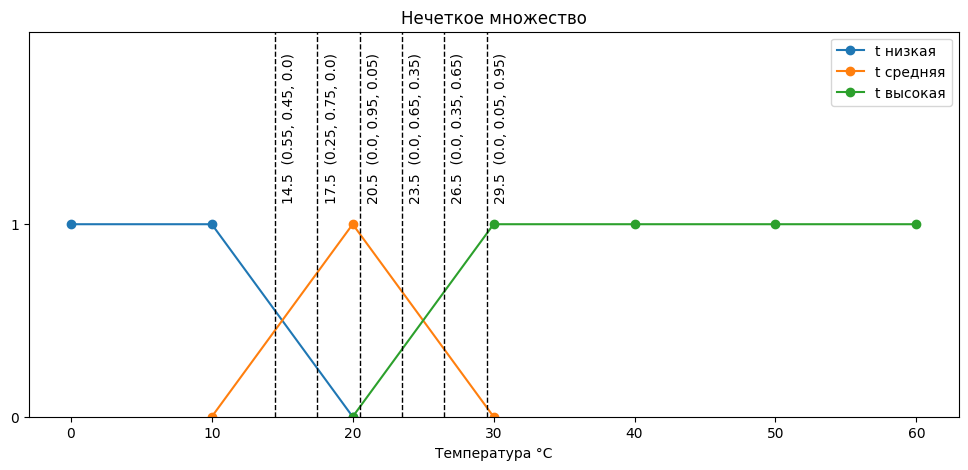

In [20]:
y = [point[1] for point in lowT]
plt.plot(T[:3], y, 'o-', label = "t низкая") 

y = [point[1] for point in medT]
plt.plot(T[1:4], y, 'o-', label = "t средняя")

y = [point[1] for point in highT]
plt.plot(T[2:7], y, 'o-', label = "t высокая")

vals = (get_y_from_x(plt.gca(), temps))
for i, temp in enumerate(temps):
    plt.text(temp + .5, 1.5, f"{temp}  ({', '.join([str(val) for val in  vals[i]])})", color='black', verticalalignment='center', fontsize = 10, rotation = 90)
    plt.axvline(x=temp, color='black', linestyle='--', linewidth = 1)

plt.xlabel('Температура °C')
plt.title('Нечеткое множество')

plt.ylim(0, 2)

plt.xticks(T)
plt.yticks([0, 1])

plt.legend()
plt.show()

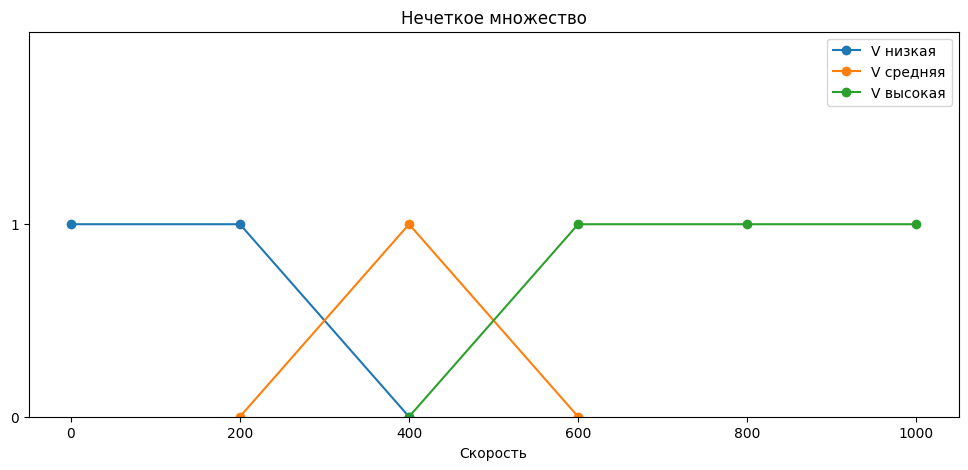

In [21]:
y = [point[1] for point in lowV]
plt.plot(V[:3], y, 'o-', label = "V низкая") 

y = [point[1] for point in medV]
plt.plot(V[1:4], y, 'o-', label = "V средняя")

y = [point[1] for point in highV]
plt.plot(V[2:7], y, 'o-', label = "V высокая")

plt.xlabel('Скорость')
plt.title('Нечеткое множество')

plt.ylim(0, 2)

plt.xticks(V)
plt.yticks([0, 1])

plt.legend()
plt.show()

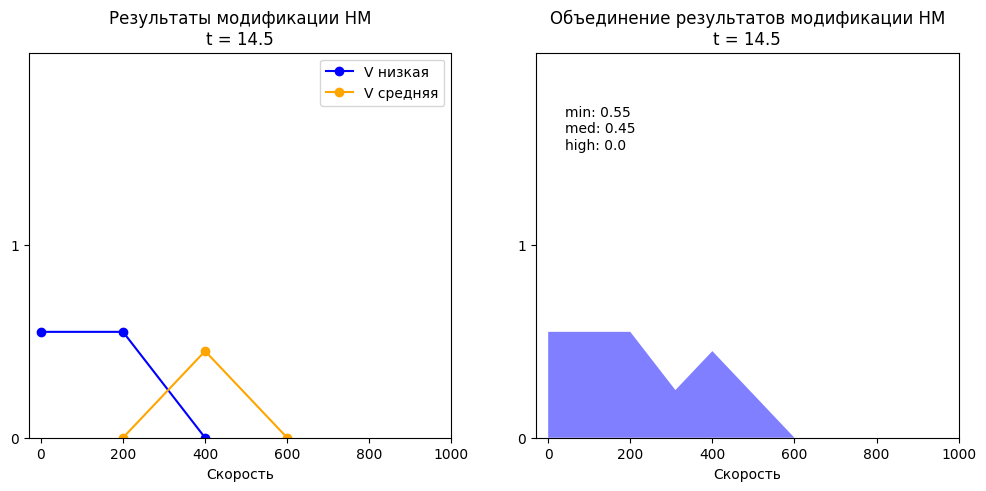

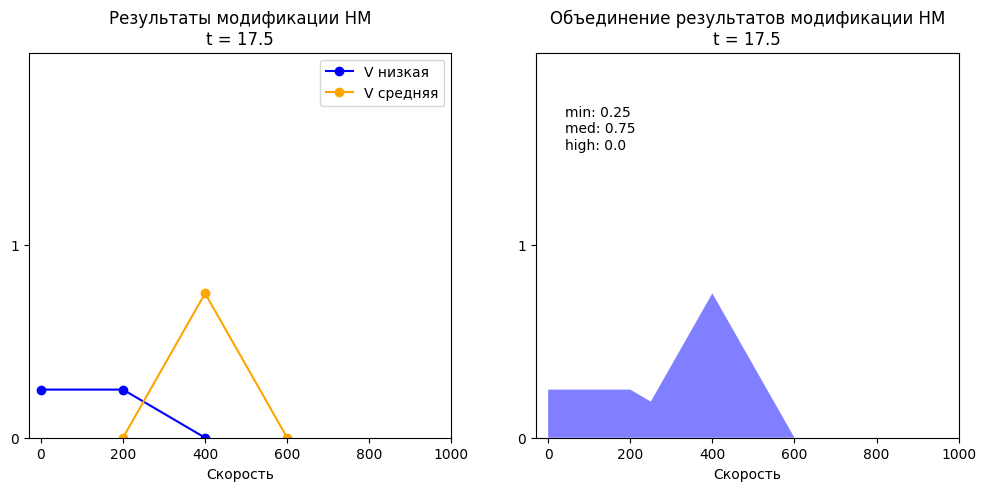

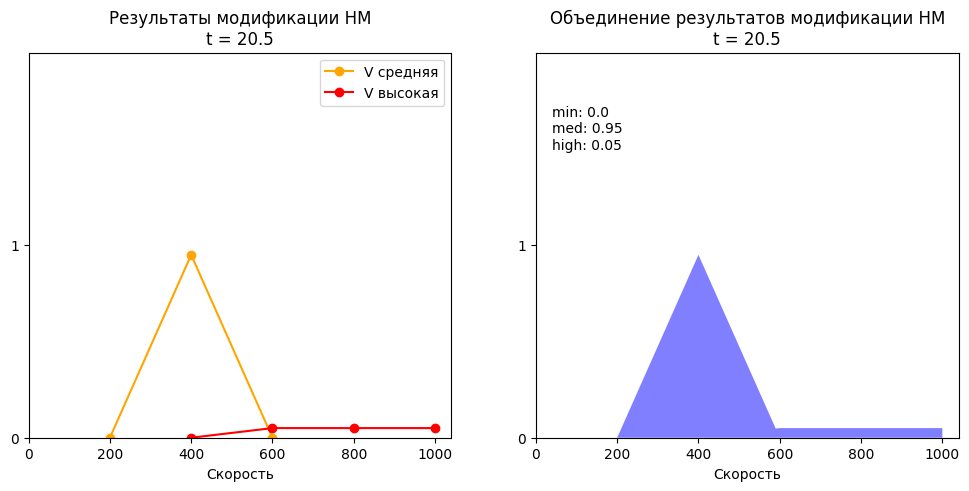

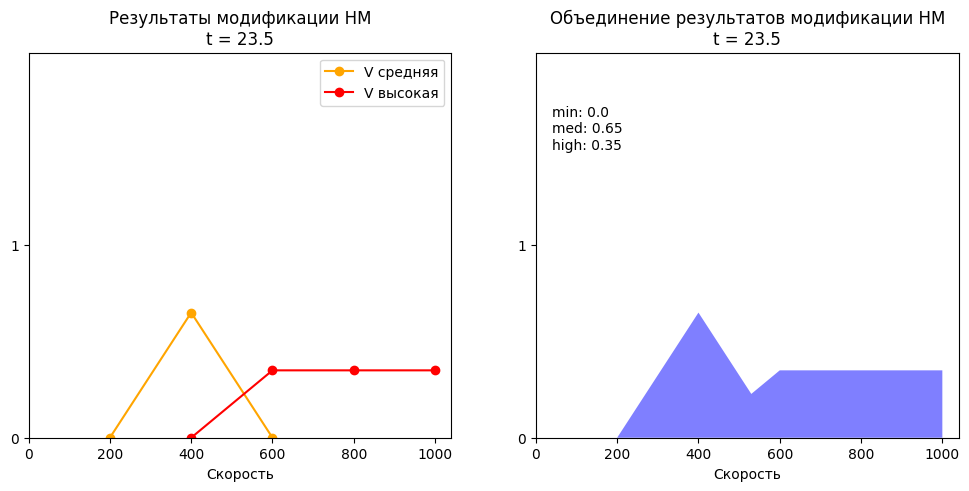

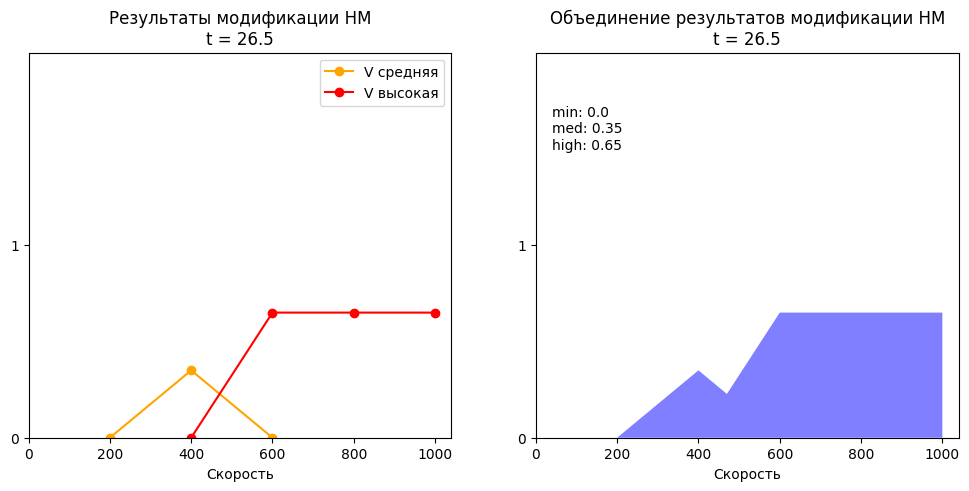

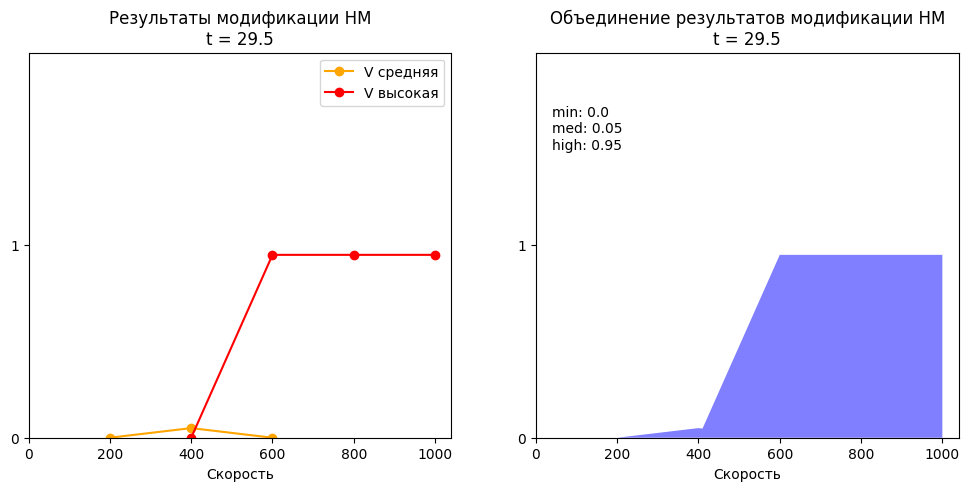

In [22]:
polygons = []

for i, val in enumerate(vals):

    axes = plt.subplot(1, 2, 1)
    
    if val[0] != 0:
        y = [point[1] * val[0] for point in lowV]
        plt.plot(V[:3], y, 'o-', label = "V низкая", color = 'b') 

    if val[1] != 0:
        y = [point[1] * val[1] for point in medV]
        plt.plot(V[1:4], y, 'o-', label = "V средняя", color = 'orange')

    if val[2] != 0:
        y = [point[1] * val[2] for point in highV]
        plt.plot(V[2:7], y, 'o-', label = "V высокая", color = 'r')

    plt.xlabel('Скорость')
    plt.title(f'Результаты модификации НМ\nt = {temps[i]}')

    plt.ylim(0, 2)

    plt.xticks(V)
    plt.yticks([0, 1])

    plt.legend()

    axes = plt.subplot(1, 2, 2)

    if val[0] != 0:
        x = [V[0]]
        y = [0]
        x += list(V[:3])
        y += [point[1] * val[0] for point in lowV]
        t = tuple(zip(x, y))
        p0 = Polygon(t)

    if val[1] != 0:
        x = [V[1]]
        y = [0]
        x += list(V[1:4])
        y += [point[1] * val[1] for point in medV]
        t = tuple(zip(x, y))
        p1 = Polygon(t)
    

    if val[2] != 0:
        x = list(V[2:7])
        y = [point[1] * val[2] for point in highV]
        x.append(V[5])
        y.append(0)
        t = tuple(zip(x, y))
        p2 = Polygon(t)
    if val[0] != 0 and val[1] != 0:
        union = so.unary_union([p0, p1])
        x, y = union.exterior.xy
        polygons.append(union)
    elif val[1] != 0 and val[2] != 0:
        union = so.unary_union([p1, p2])
        x, y = union.exterior.xy
        polygons.append(union)

    plt.fill(x, y, alpha=0.5, fc='blue', ec='none')
    plt.text(40, 1.5, f'min: {val[0]}\nmed: {val[1]}\nhigh: {val[2]}')
    plt.xlabel('Скорость')
    plt.title(f'Объединение результатов модификации НМ\nt = {temps[i]}')

    plt.ylim(0, 2)

    plt.xticks(V)
    plt.yticks([0, 1])

    plt.show()

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mi>A</mi><mo>=</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><munderover><mo>∑</mo><mrow><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><mo stretchy="false">(</mo><msub><mi>x</mi><mi>i</mi></msub><msub><mi>y</mi><mrow><mi>i</mi><mo>+</mo><mn>1</mn></mrow></msub><mo>−</mo><msub><mi>x</mi><mrow><mi>i</mi><mo>+</mo><mn>1</mn></mrow></msub><msub><mi>y</mi><mi>i</mi></msub><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">A = \frac{1}{2} \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) 
</annotation></semantics></math>

In [35]:
A = []

for polygon in polygons:
    area = 0
    x = (polygon.exterior.xy[0])[::-1]
    y = (polygon.exterior.xy[1])[::-1]
    for i in range(len(x) - 1):
        area += x[i] * y[i + 1] - x[i + 1] * y[i]
    A.append(area / 2)

print(' '.join([str(area) for area in A]))

230.25 206.25 210.25 282.25 372.25 480.25


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><msub><mi>C</mi><mi>x</mi></msub><mo>=</mo><mfrac><mn>1</mn><mrow><mn>6</mn><mi>A</mi></mrow></mfrac><munderover><mo>∑</mo><mrow><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><mo stretchy="false">(</mo><msub><mi>x</mi><mi>i</mi></msub><mo>+</mo><msub><mi>x</mi><mrow><mi>i</mi><mo>+</mo><mn>1</mn></mrow></msub><mo stretchy="false">)</mo><mo stretchy="false">(</mo><msub><mi>x</mi><mi>i</mi></msub><msub><mi>y</mi><mrow><mi>i</mi><mo>+</mo><mn>1</mn></mrow></msub><mo>−</mo><msub><mi>x</mi><mrow><mi>i</mi><mo>+</mo><mn>1</mn></mrow></msub><msub><mi>y</mi><mi>i</mi></msub><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">C_x = \frac{1}{6A} \sum_{i=1}^{n} (x_i + x_{i+1})(x_i y_{i+1} - x_{i+1} y_i) 
</annotation></semantics></math><br><br>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><msub><mi>C</mi><mi>y</mi></msub><mo>=</mo><mfrac><mn>1</mn><mrow><mn>6</mn><mi>A</mi></mrow></mfrac><munderover><mo>∑</mo><mrow><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><mo stretchy="false">(</mo><msub><mi>y</mi><mi>i</mi></msub><mo>+</mo><msub><mi>y</mi><mrow><mi>i</mi><mo>+</mo><mn>1</mn></mrow></msub><mo stretchy="false">)</mo><mo stretchy="false">(</mo><msub><mi>x</mi><mi>i</mi></msub><msub><mi>y</mi><mrow><mi>i</mi><mo>+</mo><mn>1</mn></mrow></msub><mo>−</mo><msub><mi>x</mi><mrow><mi>i</mi><mo>+</mo><mn>1</mn></mrow></msub><msub><mi>y</mi><mi>i</mi></msub><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">C_y = \frac{1}{6A} \sum_{i=1}^{n} (y_i + y_{i+1})(x_i y_{i+1} - x_{i+1} y_i) 
</annotation></semantics></math>

In [40]:
CX = []
CY = []
for j, polygon in enumerate(polygons):
    cx = 0
    cy = 0
    x = (polygon.exterior.xy[0])[::-1]
    y = (polygon.exterior.xy[1])[::-1]
    for i in range(len(x) - 1):
        cx += (x[i] + x[i + 1]) * (x[i] * y[i + 1] - x[i + 1] * y[i])
        cy += (y[i] + y[i + 1]) * (x[i] * y[i + 1] - x[i + 1] * y[i])
    CX.append(round(cx / (6 * A[j]), 3))
    CY.append(round(cy / (6 * A[j]), 3))

print(' '.join([str(x) for x in CX]))
print(' '.join([str(y) for y in CY]))

235.219 321.717 438.284 606.073 697.164 742.185
0.225 0.217 0.289 0.195 0.282 0.439
